# Módulo 5: Machine Learning - Postwork 4

### Team
- [Omar Garduza](https://github.com/OmarGard)
- [Lizzeth Gómez Rodríguez](https://github.com/LIZZETHGOMEZ)
- [Alan Sandoval](https://github.com/SanLnAlan)

## Impacto de Cambio Climático en la Salud Pública

### **Objetivo**
Descubrir si hay alguna relación o impacto entre el padecimiento de enfermedades respiratorias y los efectos del cambio climático como son gases de efecto invernadero(CO2,CH4,N2O,F-Gas) y la temperatura promedio en los países de la OCDE mediante el uso de un modelo de regresión lineal para poder predecir el número de muertes que se espera ocurran en un país dadas las condiciones del cambio climático

### Descripción de los datos
1. **country**: Países miembros de la OCDE
2. **year**: Año (1990-2018)
3. **respiratory_infections_and_tuberculosis_number**: Número de muertes por infecciones respiratorias y tuberculosis
4. **respiratory_infections_and_tuberculosis_percent**: Porcentaje de muertes por infecciones respiratorias y tuberculosis
5. **respiratory_infections_and_tuberculosis_rate**: Tasa de muertes por infecciones respiratorias y tuberculosis
6. **chronic_respiratory_diseases_number**: Número de muertes por enfermedades respiratorias crónicas
7. **chronic_respiratory_diseases_percent**: Porcentaje de muertes por enfermedades respiratorias crónicas
8. **chronic_respiratory_diseases_rate**: Tasa de muertes por enfermedades respiratorias crónicas
9. **all_greenhouse_gas**: Total de gases de efecto invernadero
10.	**CO2**: Emisiones de dióxido de carbono
11. **CH4**: Emisiones de metano
12.	**N2O**: Emisiones de nitrógeno
13.	**Fgas**: Emisiones de gases de fluoruro
14.	**mean_annual_temp**: Temperatura promedio en grados Celsius
15. **total_respiratory_diseases** Total de muertes por enfermedades respiratorias
16.	**total_diseases_percent** Porcentaje total de muertes por enfermedades respiratorias

### Lectura de Datos

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import random
from matplotlib.lines import Line2D
import warnings

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Bibliotecas para correr modelos
from scipy.stats import norm 
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 

warnings.filterwarnings("ignore")

In [3]:
# Cargamos los datos a utilizar (previamente procesados)
df = pd.read_csv("https://raw.githubusercontent.com/OmarGard/Bedu-E2-Modulo5/main/Data/cleanData.csv", index_col = 0)
df.head()

,country,year,respiratory_infections_and_tuberculosis_number,respiratory_infections_and_tuberculosis_percent,respiratory_infections_and_tuberculosis_rate,chronic_respiratory_diseases_number,chronic_respiratory_diseases_percent,chronic_respiratory_diseases_rate,all_greenhouse_gas,CO2,CH4,N2O,Fgas,mean_annual_temp,total_respiratory_diseases,total_diseases_percent
0,Mexico,1990,39290,0.08916,45.96035,16909,0.03839,19.78044,417.45,290.01,88.10,37.47,1.87,20.958333,56199,0.12755
1,Canada,1990,6797,0.03571,24.93967,9319,0.04895,34.19049,626.36,483.99,87.75,42.92,11.70,-7.450000,16116,0.08466
2,Israel,1990,772,0.02651,15.56473,1327,0.04556,26.75464,43.95,33.78,8.35,1.62,0.21,19.816667,2099,0.07207
3,Japan,1990,68816,0.08483,54.67434,29862,0.03681,23.72535,1109.37,1016.89,37.86,28.33,26.30,11.658333,98678,0.12164
4,Mexico,1991,37046,0.08447,42.53984,17171,0.03917,19.71738,435.45,308.41,88.71,36.36,1.97,20.891667,54217,0.12364


# Postwork 3: Clasificación No Supervisada

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          928 non-null    object 
 1   year                                             928 non-null    int64  
 2   respiratory_infections_and_tuberculosis_number   928 non-null    int64  
 3   respiratory_infections_and_tuberculosis_percent  928 non-null    float64
 4   respiratory_infections_and_tuberculosis_rate     928 non-null    float64
 5   chronic_respiratory_diseases_number              928 non-null    int64  
 6   chronic_respiratory_diseases_percent             928 non-null    float64
 7   chronic_respiratory_diseases_rate                928 non-null    float64
 8   all_greenhouse_gas                               928 non-null    float64
 9   CO2                             

In [4]:
# Eliminamos variables que no utilizaremos
data = df[['CO2','N2O', 'CH4','Fgas', 'mean_annual_temp']]
data.head()

,CO2,N2O,CH4,Fgas,mean_annual_temp
0,290.01,37.47,88.10,1.87,20.958333
1,483.99,42.92,87.75,11.70,-7.450000
2,33.78,1.62,8.35,0.21,19.816667
3,1016.89,28.33,37.86,26.30,11.658333
4,308.41,36.36,88.71,1.97,20.891667


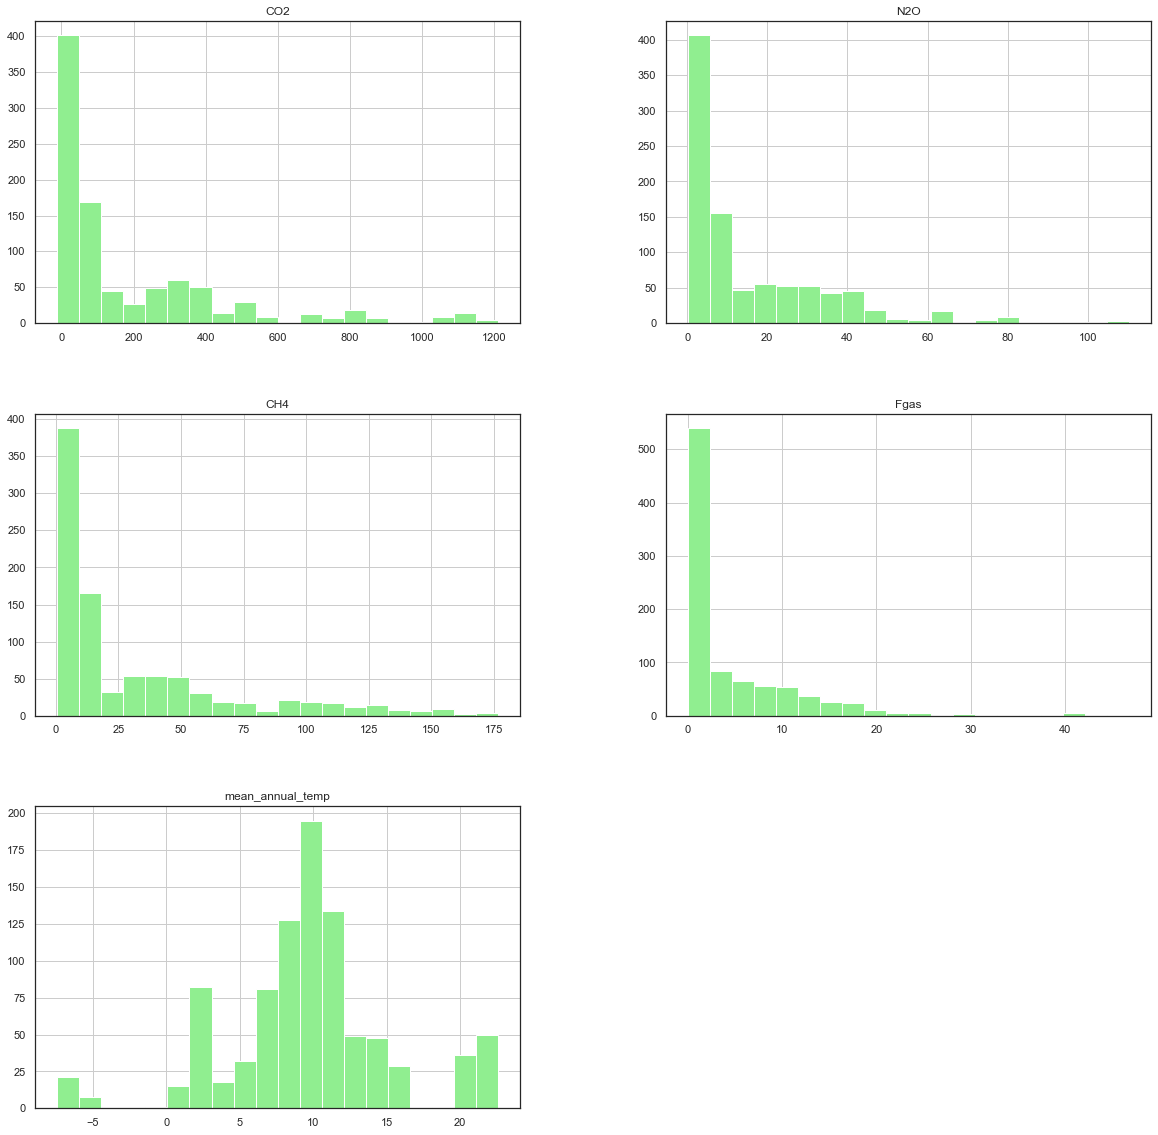

In [5]:
# Observamos la distribución de nuestros datos
sns.set(style = "white", rc = {"figure.figsize":(20,20)});
data.hist(bins = 20, color = 'lightgreen');

Notemos que la mayoría de nuestras variables están un poco sesgadas, además no se distribuyen como una normal ni se encuentran en el mismo rango de datos, por lo cual procederemos a realizar una reparametrización.

In [5]:
# Estandarizamos
std_scaler = StandardScaler()
data_cluster = data.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [7]:
data_cluster

,CO2,N2O,CH4,Fgas,mean_annual_temp
0,0.382197,1.130414,1.469629,-0.423375,2.001963
1,1.128214,1.418337,1.460551,0.935677,-3.009530
2,-0.603224,-0.763538,-0.599013,-0.652879,1.800563
3,3.177665,0.647549,0.166449,2.954207,0.361357
4,0.452960,1.071773,1.485452,-0.409549,1.990203
...,...,...,...,...,...
923,0.206980,0.225966,0.220403,0.466991,0.799440
924,-0.650105,-0.054561,0.028194,-0.467616,0.189358
925,-0.373051,-0.613501,-0.602904,-0.319683,0.354007
926,0.604602,0.645436,0.512736,1.224631,-0.054675


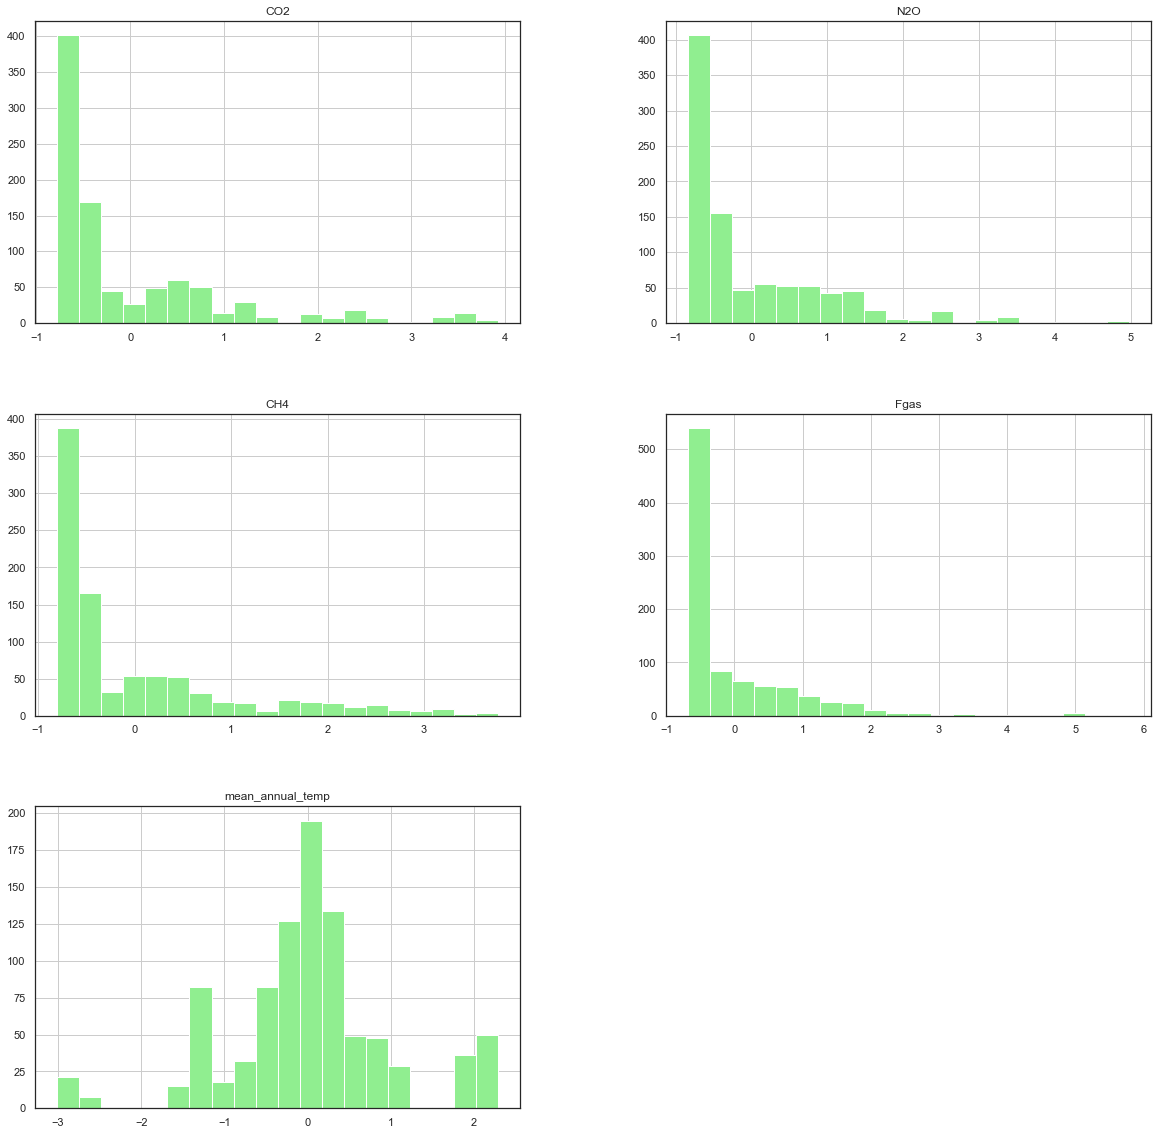

In [8]:
# Graficamos nuevamente 
sns.set(style = "white", rc = {"figure.figsize":(20,20)});
data_cluster.hist(bins = 20, color = 'lightgreen');

Notemos que todos nuestros datos ahora se encuentran en el mismo rango , aunque aún hay un poco de sesgo, la reparametrización nos permitirá modelar más acertadamente.

Una vez estandarizados nuestros datos, hacemos el **Análisis de Componentes Principales**

In [6]:
# Queremos reducir a dos dimensiones
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)
print("Varianza acumulada explicada por las nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por las nuevas variables: 82.10%


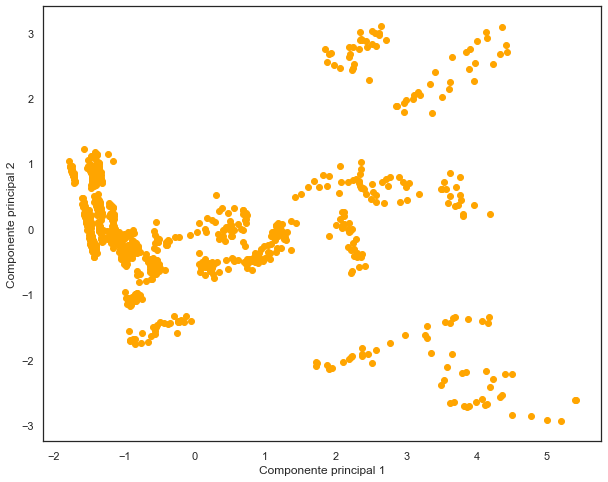

In [10]:
#Graficamos
plt.figure(figsize = (10,8))
sns.set(style = "white")
plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], color = 'orange')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show();

Una vez que hemos reducido a 2 dimensiones, procedemos a realizar la clusterización, sin embargo para poder saber realmente cuántos clusters debemos hacer, entonces aplicamos el método del codo y reforzamos esta evaluación con el método de la silueta.

In [8]:
# Clusterización
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

In [12]:
# Generación del método confirmatorio: método de la silueta
silueta = {}
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters = i, init = "k-means++", random_state = 18, n_init = 15, max_iter = 500)
  kmeans.fit(data_cluster)
  silueta[i] = silhouette_score(data_cluster, kmeans.labels_, metric = "euclidean")

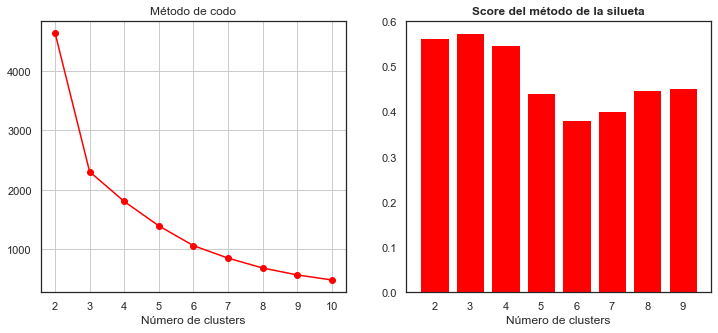

In [13]:
# Graficamos
sns.set(style = "white", rc = {"figure.figsize":(12,5)})

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia) + 2), inertia, marker = "o", color = "red")
plt.xlabel("Número de clusters")
plt.title("Método de codo")
plt.grid(True)

plt.subplot(1,2,2)

plt.bar(range(len(silueta)), list(silueta.values()), align = "center", color = "red")
plt.xticks(range(len(silueta)), list(silueta.keys()))
plt.title("Score del método de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()

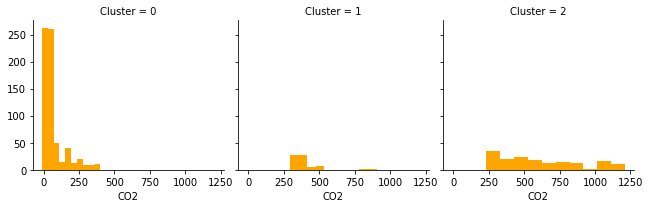

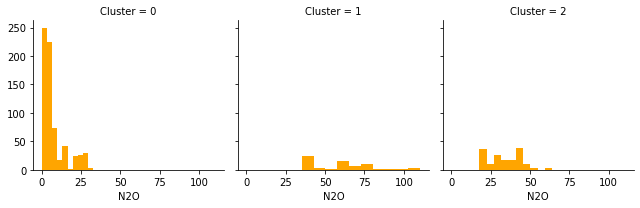

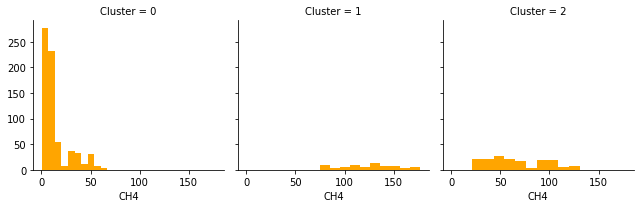

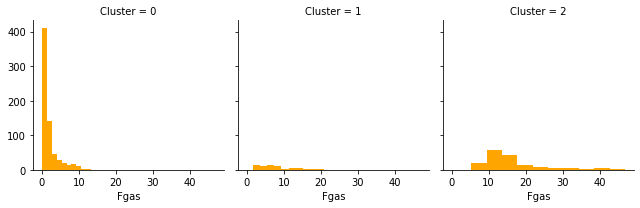

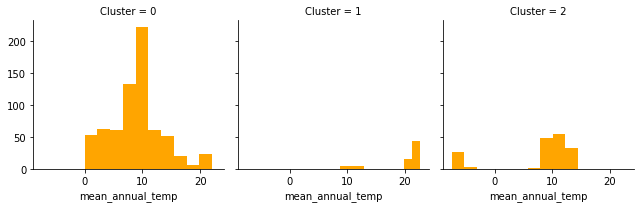

In [9]:
# Sabemos que son 2 clusters entonces
kmeans = cluster.KMeans(n_clusters = 3, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

data2 = data.copy()
data2["Cluster"] = kmeans_labels

aux = data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
  grid = sns.FacetGrid(data2, col = "Cluster")
  grid.map(plt.hist, cluster, color = "orange")

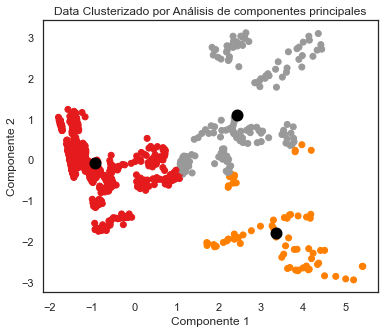

In [15]:
sns.set(style = "white", rc = {"figure.figsize": (6,5)})

plt.scatter(x = pca_2_resultados[:,0], y = pca_2_resultados[:,1], c = kmeans_labels, cmap = "Set1")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = "o",  color = "black", linewidths = 6, zorder = 10);
plt.title("Data Clusterizado por Análisis de componentes principales")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2");

In [10]:

from sklearn.model_selection import train_test_split
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest

# Separación de train & test
X = data2[["CH4","mean_annual_temp"]]   # score_arbol = 0.48   score_forest = 0.931

y = data2[["Cluster"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [12]:

# entrenamiento de modelo con Random Forest
bosque = forest(n_estimators=500,random_state=42)
bosque.fit(X_train,y_train)

# evaluación de modelo
print(f'\nscore = {bosque.score(X_test,y_test)}')


score = 0.9310344827586207


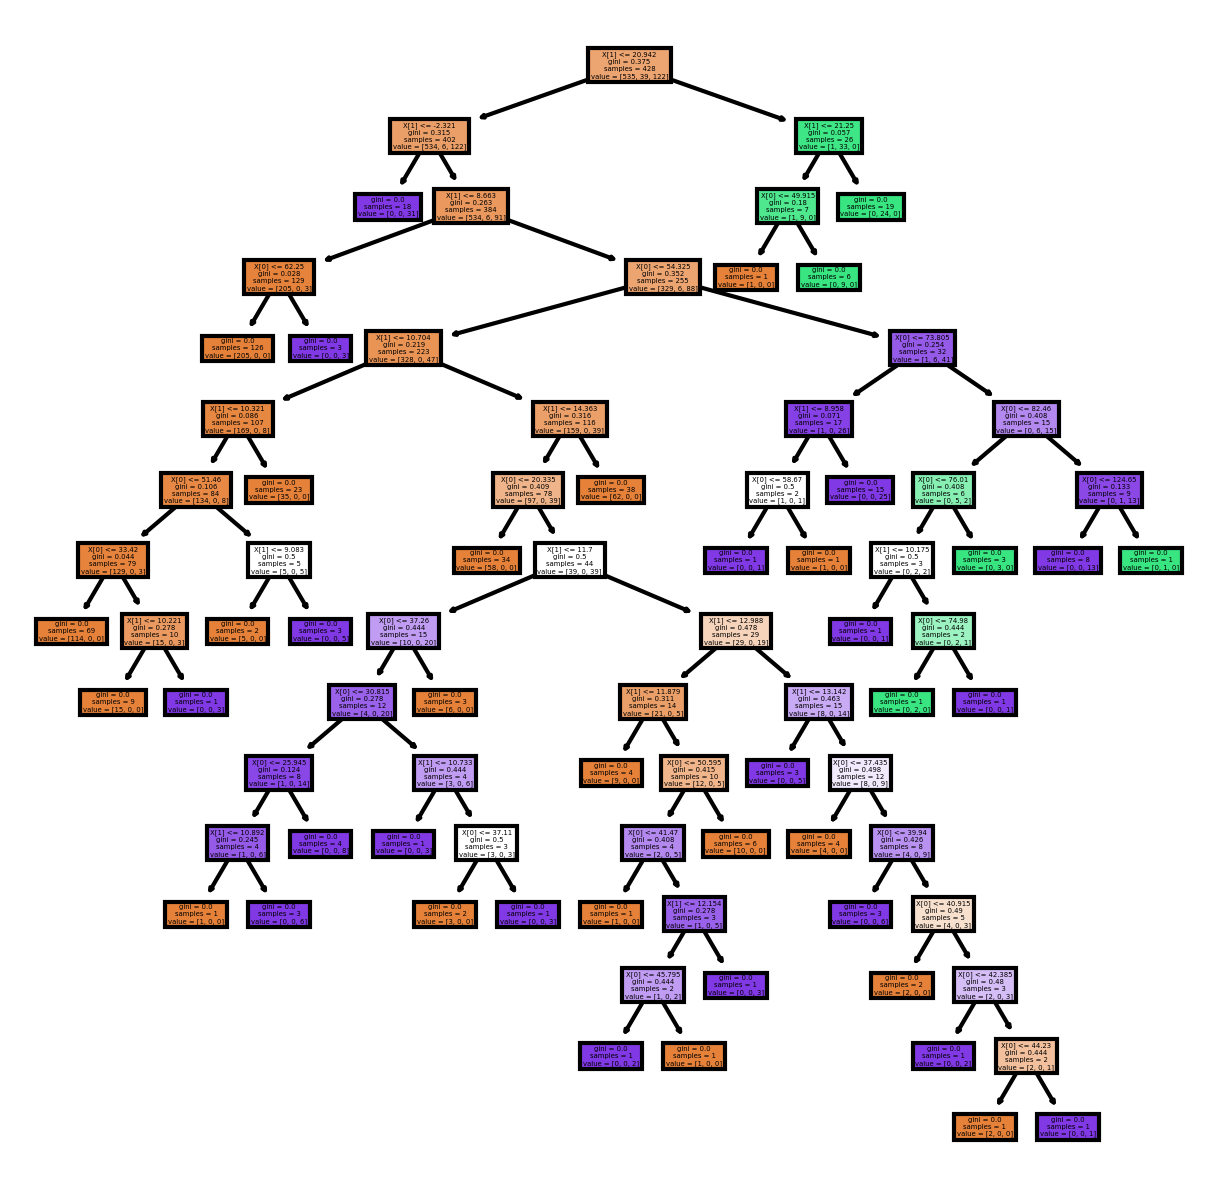

In [13]:
#Visualizando la bifurcación de un solo árbol

numeroArbol = 23
arbolDelBosque = bosque.estimators_[numeroArbol]

plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbolDelBosque,filled = True);
plt.show()

## Postwork 4: Regresiones

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          928 non-null    object 
 1   year                                             928 non-null    int64  
 2   respiratory_infections_and_tuberculosis_number   928 non-null    int64  
 3   respiratory_infections_and_tuberculosis_percent  928 non-null    float64
 4   respiratory_infections_and_tuberculosis_rate     928 non-null    float64
 5   chronic_respiratory_diseases_number              928 non-null    int64  
 6   chronic_respiratory_diseases_percent             928 non-null    float64
 7   chronic_respiratory_diseases_rate                928 non-null    float64
 8   all_greenhouse_gas                               928 non-null    float64
 9   CO2                             

### Análisis Exploratorio
En principio veamos los países que han tenido mayor número de muertes a lo largo de nuestro rango de años que es de 1990 - 2018

In [17]:
# Agrupamos por países
paises = df.groupby(['country']).agg({'total_respiratory_diseases':['mean','median','min','max']})
paises.sort_values(by=('total_respiratory_diseases','mean'),ascending=False).head(10)

total_respiratory_diseases                       
                                     mean  median    min     max
country                                                         
Japan                       132896.724138  127779  98678  172442
United Kingdom               84735.344828   84571  76294   93204
Germany                      57779.310345   57109  50348   69468
Mexico                       50941.620690   50934  43922   61641
Turkey                       42297.103448   41967  32805   55387
Spain                        41097.758621   42250  32844   50134
France                       41030.793103   41708  36398   45570
Italy                        36647.655172   35621  33360   43303
Poland                       21374.034483   21106  19404   23605
Canada                       20468.448276   19970  16116   26848

Vamos a graficar su comportamiento a lo largo de los años para ver sus tendencias

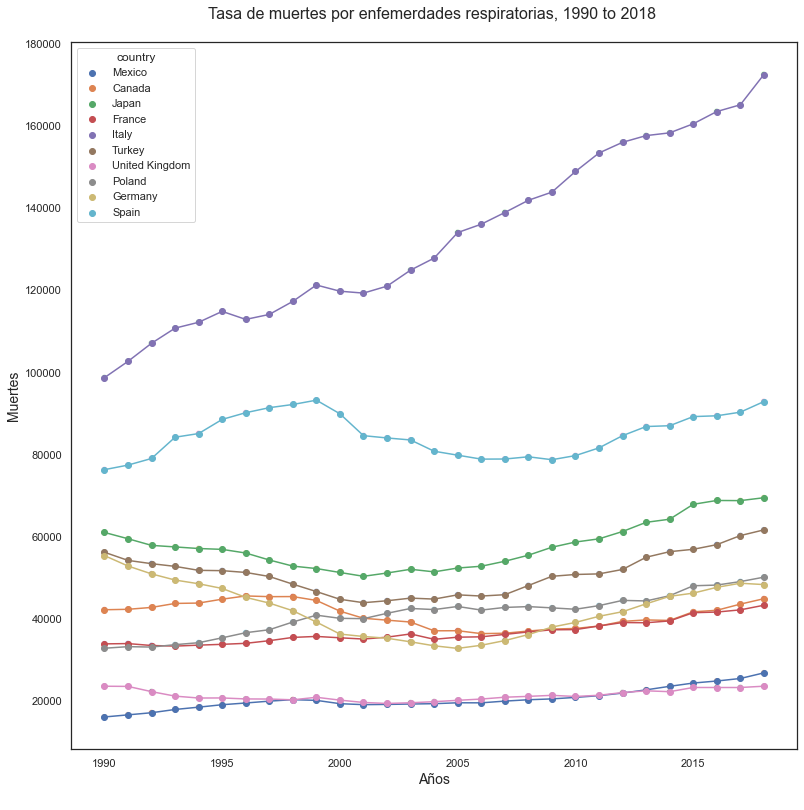

In [18]:
#Obtenemos los 10 países
top_10_paises = paises.sort_values(by=('total_respiratory_diseases','mean'),ascending=False).head(10).index
top_10_paises_df = df[df['country'].isin(top_10_paises)]
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot()
sns.scatterplot(data = top_10_paises_df, 
                x='year', 
                y='total_respiratory_diseases', 
                hue='country',
                ax=ax);
ax.set_xlabel("Años\n", fontsize = 14)
ax.set_ylabel("Muertes", fontsize = 14)
ax.set_title("Tasa de muertes por enfemerdades respiratorias, 1990 to 2018 \n",fontsize = 16)
for key,grp in top_10_paises_df.groupby('country'):
    grp = grp.sort_values(by=['year'])
    plt.plot(grp.year,grp.total_respiratory_diseases,'o-',label = key)
plt.show()

Ahora observaremos las emisiones totales de gases de efecto invernadero por los 10 paises que más emiten

In [19]:
# Agrupamos por países
paises = df.groupby(['country']).agg({'all_greenhouse_gas':['mean','median','min','max']})
paises.sort_values(by=('all_greenhouse_gas','mean'),ascending=False).head(10)

all_greenhouse_gas                           
                             mean   median      min      max
country                                                     
Japan                 1182.901724  1186.26  1073.57  1289.00
Germany                923.368621   924.72   776.61  1109.28
Canada                 819.938621   825.24   622.29  1023.93
United Kingdom         630.663793   666.82   441.13   761.64
Australia              604.232069   601.14   555.26   665.72
Mexico                 555.984483   543.90   417.45   698.62
Italy                  455.551724   456.75   370.58   525.16
France                 435.353103   441.98   361.37   502.72
Poland                 356.972069   353.70   292.88   429.16
Spain                  317.722414   317.67   232.63   415.54

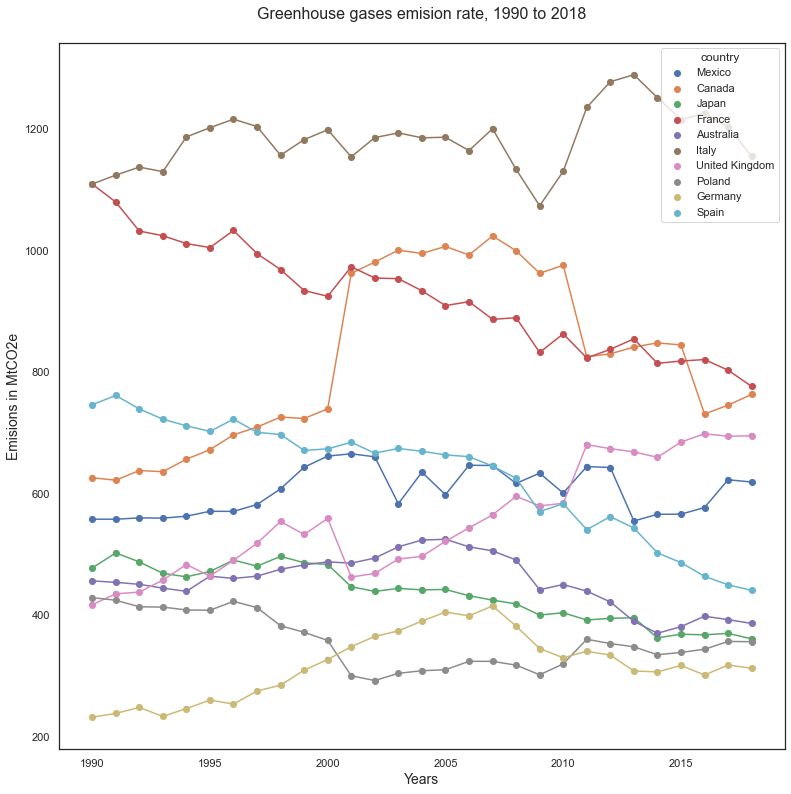

In [20]:
#Obtenemos los 10 países
top_10_paises = paises.sort_values(by=('all_greenhouse_gas','mean'),ascending=False).head(10).index
top_10_paises_df = df[df['country'].isin(top_10_paises)]
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot()
sns.scatterplot(data = top_10_paises_df, 
                x='year', 
                y='all_greenhouse_gas', 
                hue='country',
                ax=ax);
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('Emisions in MtCO2e', fontsize = 14)
ax.set_title('Greenhouse gases emision rate, 1990 to 2018\n', fontsize = 16)
for key,grp in top_10_paises_df.groupby('country'):
    grp = grp.sort_values(by=['year'])
    plt.plot(grp['year'],grp['all_greenhouse_gas'],'o-',label = key)
plt.show()

Vemos que existen países similares entre ambas tendencias, así que investigaremos la matriz de correlación para ver las relaciones entre las variables para poder construir un modelo de predicción

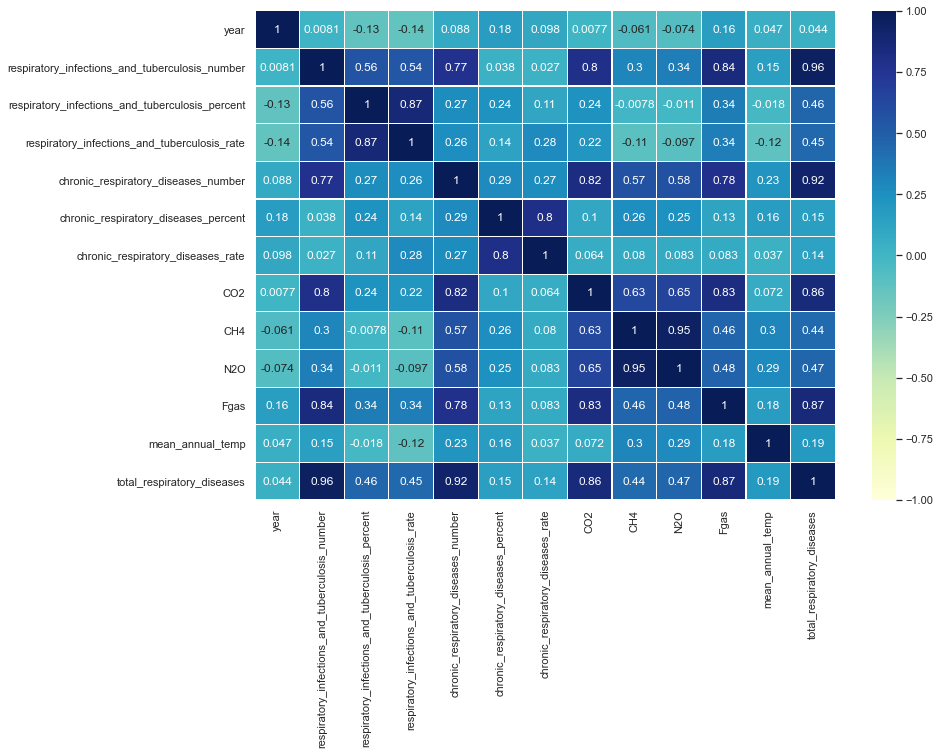

In [21]:
# Observamos correlación de las variables numericas de interés
df_num = df.drop(columns=['country','total_diseases_percent','all_greenhouse_gas'])
plt.figure(figsize = (13,9))
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'YlGnBu', linewidths = .2);

In [22]:
n_columnas = 5
correlaciones = df.drop(columns=['country',
                                 'respiratory_infections_and_tuberculosis_number',
                                 'chronic_respiratory_diseases_number',
                                 'all_greenhouse_gas',
                                 'respiratory_infections_and_tuberculosis_percent',
                                 'chronic_respiratory_diseases_percent',
                                 'respiratory_infections_and_tuberculosis_rate',
                                 'chronic_respiratory_diseases_rate',
                                 'total_diseases_percent'])
columnas_top_5 = correlaciones.corr().nlargest(n_columnas+1, 'total_respiratory_diseases')['total_respiratory_diseases']
columnas_top_5

total_respiratory_diseases    1.000000
Fgas                          0.865928
CO2                           0.856860
N2O                           0.465697
CH4                           0.440608
mean_annual_temp              0.192402
Name: total_respiratory_diseases, dtype: float64

Podemos ver que nuestra matriz en efecto es bastante azul y hay puntos muy fuertes por ejemplo el CO2 con la aparición de enfermedades crónicas, o por ejemplo los gases de fluor con las infecciones respiratorias y tuberculosis, así que podemos intentar construir un modelo de predicción para esto

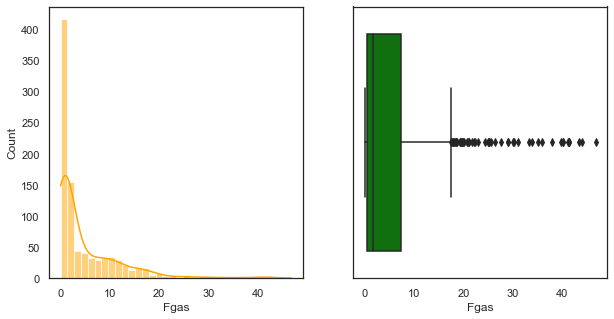

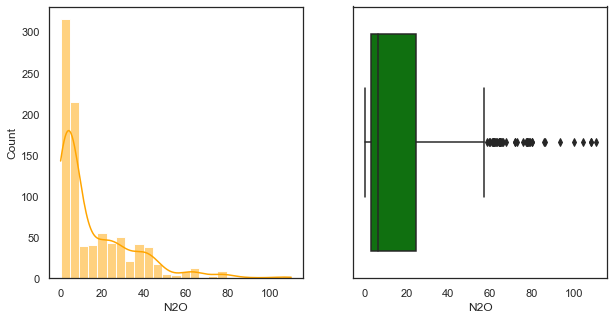

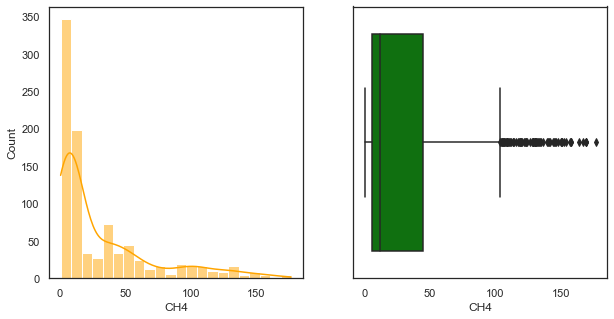

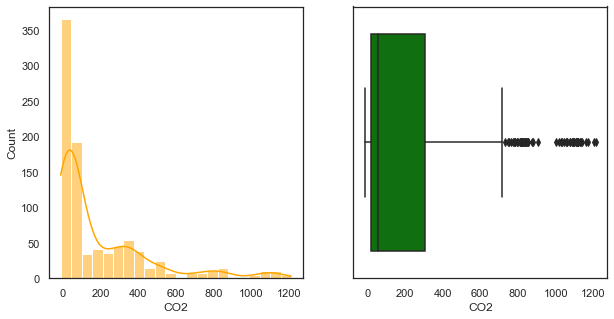

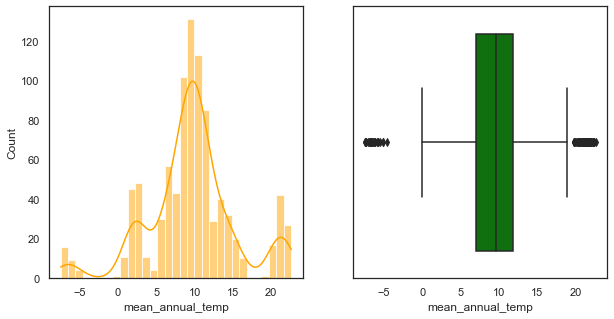

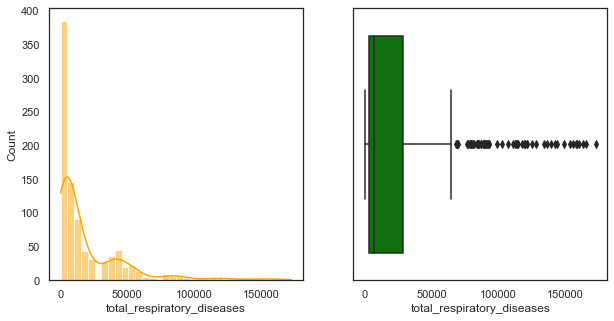

In [23]:
# Observemos su distribución
df_variables = df[['Fgas','N2O','CH4','CO2','mean_annual_temp','total_respiratory_diseases']]
for columna in df_variables.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(df_variables[columna], kde=True, ax=axes[0], color = 'orange')
    sns.boxplot(df_variables[columna], orient='h' ,ax=axes[1], color = 'green');

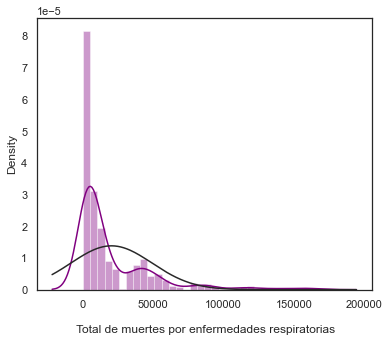

In [24]:
# Para revisar la normalidad de nuestros datos podemos seguir utilizando el 
# plot anterior. 

plt.figure()
ax = sns.distplot(df_variables['total_respiratory_diseases'], fit=norm, color = 'purple')
plt.xlabel("\n Total de muertes por enfermedades respiratorias", fontsize = 12);
#plt.xticks(rotation=90);

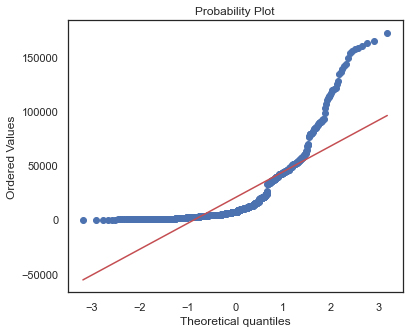

In [25]:
plt.figure()
ax = stats.probplot(df_variables['total_respiratory_diseases'], plot=plt)
plt.show();

### Modelos de Predicción

#### Modelo 1
Vamos a correr los modelos de predicción

__M1__ : Muertes por todos los gases de efecto invernadero + temperatura

In [26]:
X = df_variables.drop(columns='total_respiratory_diseases')
y = df_variables[['total_respiratory_diseases']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Vamos a hacer la predicción sobre nuestro conjunto de entrenamiento
# y prueba

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [29]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8488317609307707, 0.745557630013248)

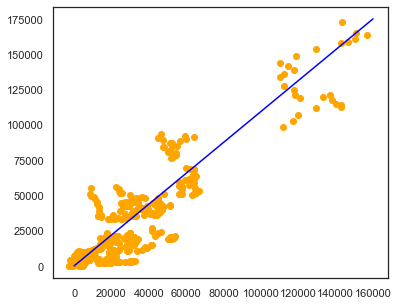

In [30]:
plt.scatter(y_train_predict, y_train, c='orange', marker='o')
plt.plot([0, 160_000], [0, 175_000], c="blue");
plt.show()

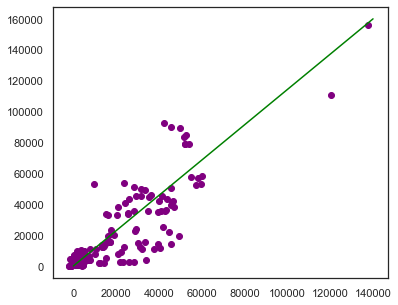

In [31]:
plt.scatter(y_test_predict, y_test, c='purple', marker='o')
plt.plot([0, 140_000], [0, 160_000], c="green");
plt.show()

Error cuadrático medio

In [32]:
mean_squared_error(y_train, y_train_predict)

134426789.80565777

In [33]:
mean_squared_error(y_test, y_test_predict)

153244811.49582124

Validación cruzada

In [34]:
scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores

array([0.73568967, 0.799695  , 0.82319528, 0.83784686, 0.86167177])

In [35]:
scores.mean()

0.8116197156626443

#### Modelo 2
__M2__: Muertes tomando en cuenta solo gases de fluoruro y CO2

In [36]:
# Establecemos variable a estimar y variables explicativas
X = df_variables[['Fgas','CO2']]
y = df_variables[['total_respiratory_diseases']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Vamos a hacer la predicción sobre nuestro conjunto de entrenamiento
# y prueba

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [39]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8249368411902419, 0.7390360812128894)

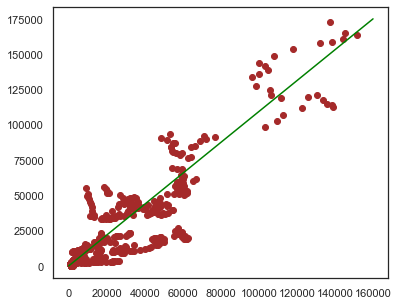

In [40]:
plt.scatter(y_train_predict, y_train, c='brown', marker='o')
plt.plot([0, 160_000], [0, 175_000], c="green");
plt.show()

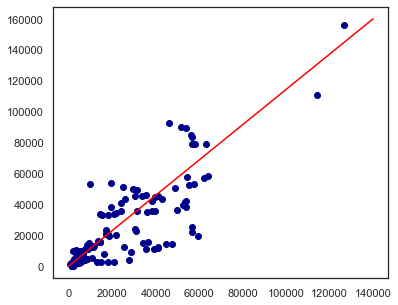

In [41]:
plt.scatter(y_test_predict, y_test, c='darkblue', marker='o')
plt.plot([0, 140_000], [0, 160_000], c="red");
plt.show()

In [42]:
scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores

array([0.73934732, 0.8228025 , 0.79167919, 0.80873088, 0.84384777])

In [43]:
scores.mean()

0.8012815329764231

### Local Outlier Factor
#### Modelo 3
__M3__: Intentaremos mejorar la precisión del mejor modelo que hemos obtenido hasta ahorita utilizando el algoritmo de Local Outlier Factor para remover algunos outliers


In [44]:
# Establecemos variable a estimar y variables explicativas
X = df_variables.drop(columns='total_respiratory_diseases')
y = df_variables[['total_respiratory_diseases']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [45]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X_train)
y_pred[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
mask = y_pred == -1
mask[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [47]:
X_train_outlier, y_train_outlier = X_train[mask], y_train[mask]
X_train_outlier.head()

,Fgas,N2O,CH4,CO2,mean_annual_temp
90,0.02,2.03,3.93,-1.20,5.841667
11,1.24,27.51,38.24,122.28,11.000000
43,0.12,4.85,12.32,13.05,8.583333
903,13.42,44.81,95.53,609.67,-7.058333
22,0.32,1.61,8.61,34.50,19.808333


In [48]:
mask = y_pred != -1 

X_train_clean, y_train_clean = X_train[mask], y_train[mask]

X_train_clean.shape, y_train_clean.shape

((726, 5), (726, 1))

In [49]:
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)

model.score(X_train_clean, y_train_clean), model.score(X_test, y_test)

(0.8508720724142489, 0.7460469255661196)

In [50]:
scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()
## No hay una mejora significativa, así que LOF no sirve para mejorar la precisión del modelo

0.8116197156626443

In [51]:
new_df = pd.concat([X_train_clean,X_test],axis=0)
new_df['total_respiratory_diseases'] = pd.concat([y_train_clean,y_test],axis=0)

In [52]:
new_df.shape

(912, 6)

#### Modelo 4
__M4__: Usar un DecisionTreeRegressor

In [53]:
# Fit regression model
model = DecisionTreeRegressor(max_depth=2)
model.fit(X_train_clean, y_train_clean)

# Predict
y_train_predict = model.predict(X_train_clean)
y_test_predict = model.predict(X_test)

model.score(X_train_clean, y_train_clean), model.score(X_test, y_test)

(0.847195847156179, 0.7314323560051144)

In [54]:
X = new_df.drop(columns='total_respiratory_diseases')
y = new_df[['total_respiratory_diseases']]

scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()

0.8047958728200442

#### Modelo 5
__M5__: Usar un Support Vector Regression

In [55]:
# Fit regression model
model = SVR().fit(X_train_clean, y_train_clean)

# Predict
y_train_predict = model.predict(X_train_clean)
y_test_predict = model.predict(X_test)

model.score(X_train_clean, y_train_clean), model.score(X_test, y_test)

(-0.20450922449473152, -0.20267992261528445)

In [56]:
X = new_df.drop(columns='total_respiratory_diseases')
y = new_df[['total_respiratory_diseases']]

scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()
# Precisión empeora

-0.20720768577516072

#### Modelo 6
__M6__: Usar Regresión de Lasso

In [57]:
# Fit regression model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train_clean, y_train_clean)

# Predict
y_train_predict = model.predict(X_train_clean)
y_test_predict = model.predict(X_test)

model.score(X_train_clean, y_train_clean), model.score(X_test, y_test)

(0.850872072413353, 0.7460470943175541)

In [58]:
X = new_df.drop(columns='total_respiratory_diseases')
y = new_df[['total_respiratory_diseases']]

scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()
# Precisión parecida a M1

0.8184206627273815

#### Modelo 7
__M7__: Usar Random Forest Regressor

In [59]:
model = RandomForestRegressor(criterion='mse',n_estimators=100)
model.fit(X_train_clean, y_train_clean)

# Predict
y_train_predict = model.predict(X_train_clean)
y_test_predict = model.predict(X_test)

model.score(X_train_clean, y_train_clean), model.score(X_test, y_test)

(0.9971838033651976, 0.9597446010896844)

In [60]:
X = new_df.drop(columns='total_respiratory_diseases')
y = new_df[['total_respiratory_diseases']]

scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()
# BINGOOOO !!

0.9791197561109964

In [61]:
mean_squared_error(y_train_clean, y_train_predict)
# MSE de M7 < MSE de M1 para el entrenamiento

2468328.6506415983

In [62]:
mean_squared_error(y_test, y_test_predict)
# MSE de M7 < MSE de M1 para el test

24244904.72251774

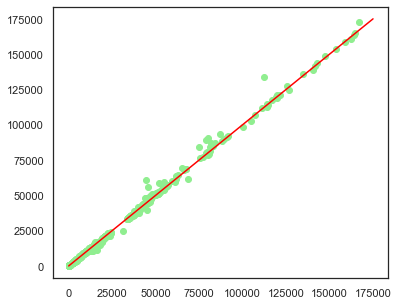

In [63]:
# Veamos las predicciones del Random Forest para el conjunto de train
plt.scatter(y_train_predict, y_train_clean, c='lightgreen', marker='o')
plt.plot([0, 175_000], [0, 175_000], c="red");
plt.show()

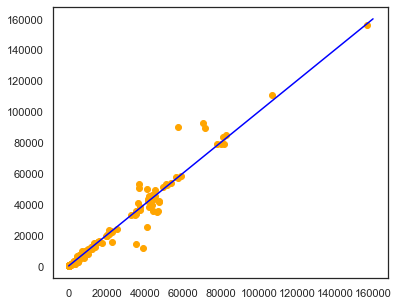

In [64]:
# Veamos las predicciones del Random Forest para el conjunto de test
plt.scatter(y_test_predict, y_test, c='orange', marker='o')
plt.plot([0, 160_000], [0, 160_000], c="blue");
plt.show()

Como podemos ver el mejor modelo que obtuvimos para la regresión fue el M7 hecho con un Random Forest Regressor, se puede apreciar en las gráficas anteriores que los valores son cercanos a la línea roja que sería lo ideal, mucho más cercanos que el M1 de cuando comenzamos con un score del __98%__ con validación cruzada, lo cuál lo hace un modelo sumamente bueno

De igual manera podemos ver que nuestro modelo puede presentar multicolinealidad, ya que por ejemplo las variables del CO2 con F-Gas presentan una correlación de 0.83, así que usaremos el __factor de inflación de la varianza( VIF )__ para corregir esto y que el poder explicativo de nuestro modelo se incremente.

$VIF = \frac{1}{1-R^2}$

In [65]:
print(f"Train R^2:{r2_score(y_train_clean, y_train_predict)}")
print(f"Test R^2:{r2_score(y_test, y_test_predict)}")
# Vemos que el R^2 es sospechosamente alto 

Train R^2:0.9971838033651976
Test R^2:0.9597446010896844


In [143]:
#Función para calcular el VIF
def calculate_vif(X, used_cols):
    VIF = []
    for col in used_cols:
        cols = used_cols.copy()
        cols.remove(col)
        model = RandomForestRegressor(criterion='mse',n_estimators=100)
        model.fit(X.iloc[:, cols], X.iloc[:, col])
        VIF.append(1 / (1 - model.score(X.iloc[:, cols], X.iloc[:, col])))
    return VIF

Observamos que presentamos en efecto una gran multicolinealidad con todas nuestras variables

In [144]:
vif_data = pd.DataFrame() 

vif_data["feature"] = X.columns 
  
vif_data["VIF"] = calculate_vif(X, list(range(X.shape[1])))
  
print(vif_data)

            feature         VIF
0              Fgas  161.708492
1               N2O  470.879658
2               CH4  635.272991
3               CO2  176.059189
4  mean_annual_temp  100.932313


Vamos a definir el umbral de tener un VIF máximo de 5, ya que es lo popular para decidir si una variable presenta multicolinealidad o no, por debajo de este umbral se pueden utilizar

In [145]:
max_vif = 5
used_cols = list(range(X.shape[1]))

VIF = calculate_vif(X, used_cols)

while np.amax(VIF) > max_vif:
    col_to_drop = VIF.index(max(VIF))
    print('Elimina columna:', used_cols[col_to_drop], 'con VIF', max(VIF))
    used_cols.pop(col_to_drop)
    VIF = calculate_vif(X, used_cols)

Elimina columna: 2 con VIF 711.052174135632
Elimina columna: 3 con VIF 163.18923879821787
Elimina columna: 1 con VIF 28.673630350219046


In [146]:
used_cols
# Las columnas candidatas son la 0 y 4

[0, 4]

In [147]:
VIF
#Ambas tienen un VIF inferior a 5

[2.85592224506896, 3.1458060725555694]

Fgas y mean_annual_temp serían buenas candidatas para un modelo sin multicolinealidad

In [149]:
vif_data["feature"] = X.columns[used_cols]
  
vif_data["VIF"] = calculate_vif(X, used_cols)
  
print(vif_data)

            feature       VIF
0              Fgas  2.855370
1  mean_annual_temp  3.110425


Por último vamos a tomar las variables de F-Gas y mean_annual_temp para correr un nuevo modelo utilizando el Random Forest y ver los resultados

#### Modelo 8
__M8__: Usar Random Forest Regressor con un variables con test de multicolinealidad

In [159]:
X_train_clean = X_train_clean[['Fgas','mean_annual_temp']]
X_test = X_test[['Fgas','mean_annual_temp']]

model = RandomForestRegressor(criterion='mse',n_estimators=100)
model.fit(X_train_clean, y_train_clean)

# Predict
y_train_predict = model.predict(X_train_clean)
y_test_predict = model.predict(X_test)

X = new_df[['Fgas','mean_annual_temp']]
y = new_df[['total_respiratory_diseases']]

scores = cross_val_score(model, X, y, scoring = 'r2', cv=5)
scores.mean()

0.8516694313587105

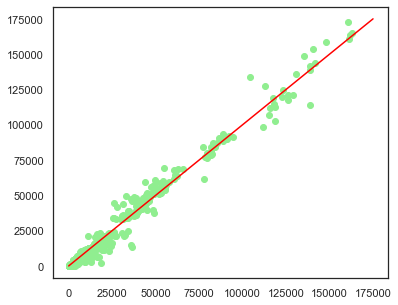

In [156]:
# Veamos las predicciones del Random Forest para el conjunto de train
plt.scatter(y_train_predict, y_train_clean, c='lightgreen', marker='o')
plt.plot([0, 175_000], [0, 175_000], c="red");
plt.show()

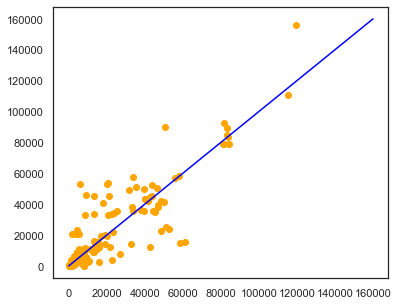

In [157]:
# Veamos las predicciones del Random Forest para el conjunto de test
plt.scatter(y_test_predict, y_test, c='orange', marker='o')
plt.plot([0, 160_000], [0, 160_000], c="blue");
plt.show()

Podemos ver que ya reduciendo la multicolinealidad, el modelo M8, es el mejor que pudimos encontrar para predecir las muertes por enfermedades respiratorias a causa del cambio climático, obteniendo una precisión de r^2 de __0.85__ con validación cruzada de 5 pliegues.

Ahora tenemos un modelo que a nivel explicativo es relevante, ya que explica las muertes y las predice a partir de la emisión de gases de fluoruro, y de igual manera, considerando la temperatura anual de los países, y a nivel estadístico, tiene un R^2 bastante bueno, lo cuál nos dice que el 85% de las muertes por enfermedades respiratorias son explicadas por las emisiones de gases de fluoruro y por la temperatura anual de los países